In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

import os
import sys
src_path = os.path.abspath(os.path.join('..', '..'))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from cnn.cnn import CNNScratch
from cnn.layer import LayerScratch, InputScratch, Conv2DScratch, MaxPooling2DScratch, FlattenScratch, DenseScratch

In [2]:
def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        images = batch[b'data']
        labels = batch[b'labels']
        images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        images = images.astype('float32') / 255.0
        labels = np.array(labels)
        return images, labels

train_images = []
train_labels = []

for i in range (5):
    file_path = f"D:/Cool Yeah/Semester VI/IF3270 - Pembejalaran Mesin/Tubes 2/cifar-10-python/cifar-10-batches-py/data_batch_{i+1}"
    images, labels = load_cifar10_batch(file_path)
    train_images.append(images)
    train_labels.append(labels)

train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)

x_test, y_test = load_cifar10_batch("D:/Cool Yeah/Semester VI/IF3270 - Pembejalaran Mesin/Tubes 2/cifar-10-python/cifar-10-batches-py/test_batch")

In [3]:
x_train, x_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

### Keras

<p>
Spesifikasi:<br/>
6 layer konvolusi:<br/>
- filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 64 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 64 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 128 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 128 dengan ukuran 3 x 3 dan aktivasi relu<br/>
3 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 128 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [4]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

C:\Users\Nicholas R. Sihite\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.3200 - loss: 1.8227 - val_accuracy: 0.5669 - val_loss: 1.2094
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.5951 - loss: 1.1330 - val_accuracy: 0.6565 - val_loss: 0.9655
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6988 - loss: 0.8571 - val_accuracy: 0.7078 - val_loss: 0.8379
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.7552 - loss: 0.6969 - val_accuracy: 0.7413 - val_loss: 0.7355
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8007 - loss: 0.5662 - val_accuracy: 0.7347 - val_loss: 0.7679
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8332 - loss: 0.4818 - val_accuracy: 0.7472 - val_loss: 0.7387
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8606 - loss: 0.4003 - val_accuracy: 0.7652 - val_loss: 0.7135
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8954 - loss: 0.3057 - 

### Simpan Model Keras

In [5]:
model_1.save("keras_model_cifar10.h5")

### Scratch

<p>
Spesifikasi:<br/>
6 layer konvolusi:<br/>
- filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 64 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 64 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 128 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 128 dengan ukuran 3 x 3 dan aktivasi relu<br/>
3 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 128 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [4]:
model_2 = CNNScratch([
    InputScratch((32, 32, 3)),
    Conv2DScratch(32, (3, 3), activation='relu', padding='same'),
    Conv2DScratch(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2DScratch(pool_size=(2, 2)),
    Conv2DScratch(64, (3, 3), activation='relu', padding='same'),
    Conv2DScratch(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2DScratch(pool_size=(2, 2)),
    Conv2DScratch(128, (3, 3), activation='relu', padding='same'),
    Conv2DScratch(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2DScratch(pool_size=(2, 2)),
    FlattenScratch(),
    DenseScratch(128, activation='relu'),
    DenseScratch(10, activation='softmax')
])

model_1_loaded = load_model("keras_model_cifar10.h5")
model_2.transfer_weights(model_1_loaded)

In [5]:
def evaluate_model(model, x_test, y_test, history=None):
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    print(classification_report(y_test, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    if history is not None:
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.title('Training vs Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
    
    return f1

### Evaluasi Model Keras

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      1000
           1       0.92      0.84      0.88      1000
           2       0.67      0.67      0.67      1000
           3       0.56      0.56      0.56      1000
           4       0.57      0.82      0.68      1000
           5       0.75      0.55      0.63      1000
           6       0.77      0.82      0.80      1000
           7       0.85      0.73      0.78      1000
           8       0.82      0.89      0.86      1000
           9       0.80      0.89      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000

Macro F1-score: 0.7460


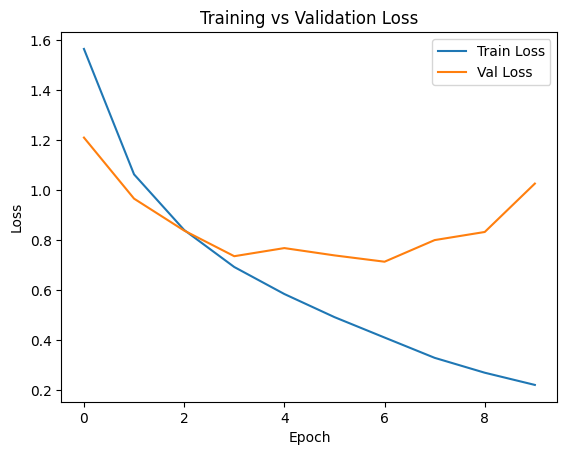

0.7460258326579206

In [8]:
evaluate_model(model_1, x_test, y_test, history_1)

### Evaluasi Model Scratch

In [6]:
evaluate_model(model_2, x_test, y_test)

Processing 1 / 313
Processing 2 / 313
Processing 3 / 313
Processing 4 / 313
Processing 5 / 313
Processing 6 / 313
Processing 7 / 313
Processing 8 / 313
Processing 9 / 313
Processing 10 / 313
Processing 11 / 313
Processing 12 / 313
Processing 13 / 313
Processing 14 / 313
Processing 15 / 313
Processing 16 / 313
Processing 17 / 313
Processing 18 / 313
Processing 19 / 313
Processing 20 / 313
Processing 21 / 313
Processing 22 / 313
Processing 23 / 313
Processing 24 / 313
Processing 25 / 313
Processing 26 / 313
Processing 27 / 313
Processing 28 / 313
Processing 29 / 313
Processing 30 / 313
Processing 31 / 313
Processing 32 / 313
Processing 33 / 313
Processing 34 / 313
Processing 35 / 313
Processing 36 / 313
Processing 37 / 313
Processing 38 / 313
Processing 39 / 313
Processing 40 / 313
Processing 41 / 313
Processing 42 / 313
Processing 43 / 313
Processing 44 / 313
Processing 45 / 313
Processing 46 / 313
Processing 47 / 313
Processing 48 / 313
Processing 49 / 313
Processing 50 / 313
Processin

0.7460258326579206